Um projétil é disparado para cima com uma inclinação (ângulo de inclinação ϕ
) com velocidade inicial vi
 em um ângulo θ
 em relação à horizontal (θ>ϕ
), como mostrado na Figura.

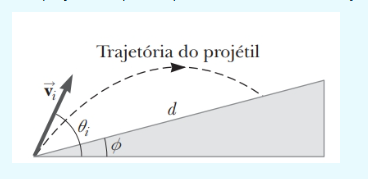

a) Escreva um programa que mostre as posições x e y do projétil em função do tempo

b) Modifique seu programa para calcular simulataneamente a posição x e y do projétil e a altura y do plano (relativo ao x do projétil) em função do tempo

c) Modifique seu programa da letra b) para comparar as alturas e encontrar o tempo que há a colisão entre o projétil e o plano. Qual o valor do tempo?

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

a) Escreva um programa que mostre as posições x e y do projétil em função do tempo

Tempo (t): [0.   0.01]
Posição x: [0.         0.01998782]
Posição y: [0.         0.00020799]


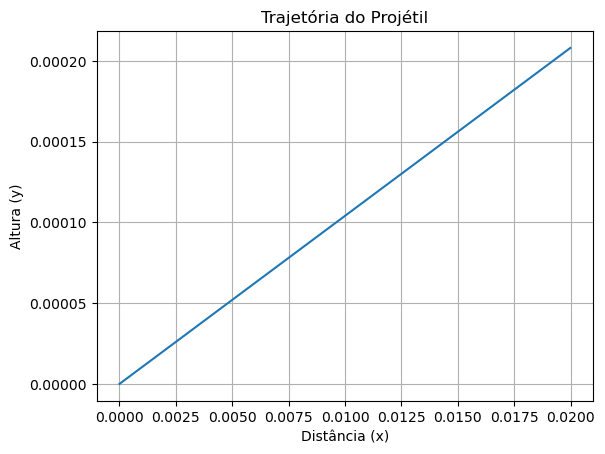

In [4]:
import numpy as np
import matplotlib.pyplot as plt

#função que calcula a trajetória do projétil
def traj_projetil(v0=None, theta=None, phi=None, g=9.8, dt=0.01):
    if v0 is None:
        v0 = int(input('Insira seu v0: '))
    if theta is None:
        theta = int(input('Insira seu theta: '))
    if phi is None:
        phi = int(input('Insira seu phi: '))


   #calculamos os angulos em radianos
    theta_rad = np.radians(theta)
    phi_rad = np.radians(phi)

    #calculos as componentes do vetor velocidade
    v0x = v0 * np.cos(theta_rad)
    v0y =v0 * np.sin(phi_rad)

    #tempo que o projetil leva para atingir o chão (tempo maximo)
    t_max = 2 * v0y / g

    #armazenando dados como arrays
    t = np.arange(0, t_max, dt)
    x = v0x * t
    y = v0y * t - 0.5 * g * t**2

    #removemos valores negativos 
    mask = y >= 0
    t = t[mask]
    x = x[mask]
    y = y[mask]

    return t, x, y

#v0 = int(input('Insira seu v0: '))
#theta = int(input('Insira seu theta: '))
#phi = int(input('Insira seu phi: '))

t, x, y = traj_projetil()
print("Tempo (t):", t)
print("Posição x:", x)
print("Posição y:", y)

# Plotando a trajetoria
plt.plot(x, y)
plt.xlabel('Distância (x)')
plt.ylabel('Altura (y)')
plt.title('Trajetória do Projétil')
plt.grid()
plt.show()
    

a) 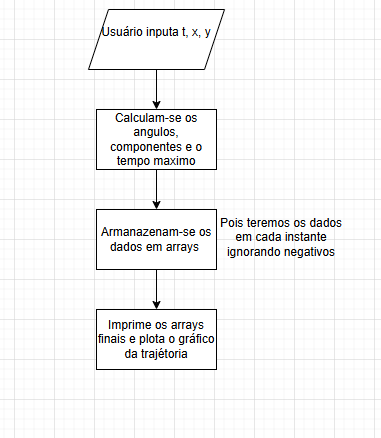

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

b) Modifique seu programa para calcular simulataneamente a posição x e y do projétil e a altura y do plano (relativo ao x do projétil) em função do tempo


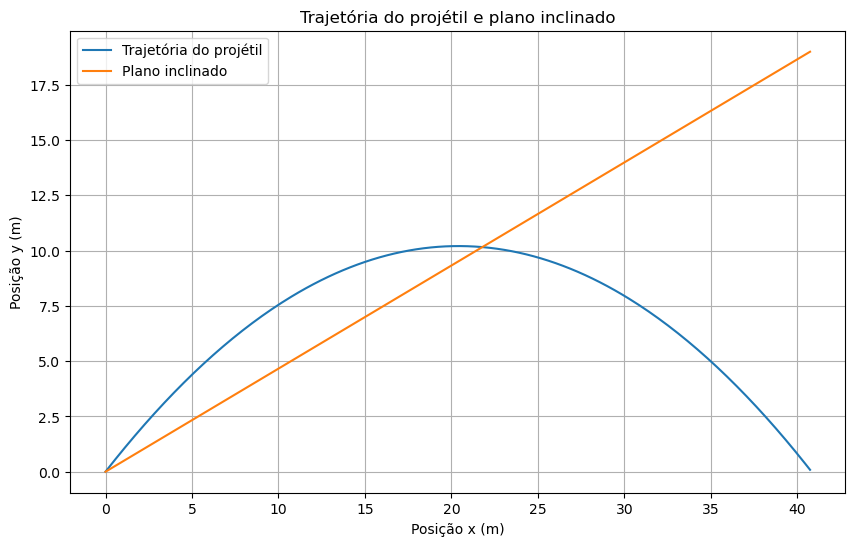

In [36]:
def trajetoria_com_plano(v0, theta, phi, g=9.8, dt=0.01):
    
    theta_rad = np.radians(theta)
    phi_rad = np.radians(phi)
    
    # Componentes da velocidade inicial
    v0x = v0 * np.cos(theta_rad)
    v0y = v0 * np.sin(theta_rad)
    
    # Tempo até o projétil atingir o solo 
    t_max = 2 * v0y / g
    
    # Arrays para armazenar resultados
    t = np.arange(0, t_max, dt)
    x = v0x * t
    y = v0y * t - 0.5 * g * t**2
    
    # Altura do plano inclinado em cada posição x
    y_plano = np.tan(phi_rad) * x
    
    # Remove valores negativos de y 
    mask = y >= 0
    t = t[mask]
    x = x[mask]
    y = y[mask]
    y_plano = y_plano[mask]
    
    return t, x, y, y_plano

v0 = 20
theta = 45
phi = 25

t, x, y, y_plano = trajetoria_com_plano(v0, theta, phi)

# Plot da trajetória e do plano
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Trajetória do projétil')
plt.plot(x, y_plano, label='Plano inclinado')
plt.xlabel('Posição x (m)')
plt.ylabel('Posição y (m)')
plt.title('Trajetória do projétil e plano inclinado')
plt.grid(True)
plt.legend()
plt.show()

c) Modifique seu programa da letra b) para comparar as alturas e encontrar o tempo que há a colisão entre o projétil e o plano. Qual o valor do tempo?

Tempo de colisão: 0.00 s
Posição (x, y): (0.00 m, 0.00 m)


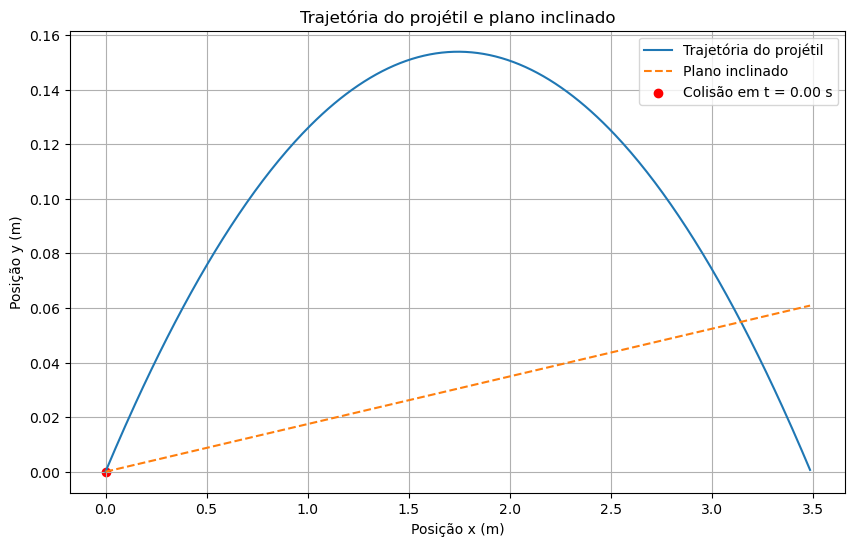

In [33]:
import numpy as np
import matplotlib.pyplot as plt

def trajetoria_com_plano(v0, theta, phi, g=9.8, dt=0.001, tol=0.01):
    theta_rad = np.radians(theta)
    phi_rad = np.radians(phi)
    
    # Componentes da velocidade
    v0x = v0 * np.cos(theta_rad)
    v0y = v0 * np.sin(theta_rad)
    
    # Tempo total de voo (sem plano)
    t_max = 2 * v0y / g
    t = np.arange(0, t_max, dt)
    
    # Trajetória do projétil
    x = v0x * t
    y = v0y * t - 0.5 * g * t**2
    
    # Equação do plano inclinado (y = tan(phi) * x)
    y_plano = np.tan(phi_rad) * x
    
    # Verifica colisão com tolerância
    colisao_mask = y <= y_plano + tol
    if np.any(colisao_mask):
        colisao_idx = np.argmax(colisao_mask)
        t_colisao = t[colisao_idx]
        x_colisao = x[colisao_idx]
        y_colisao = y[colisao_idx]
    else:
        t_colisao = None
        x_colisao = x[-1]
        y_colisao = y[-1]
    
    return t, x, y, y_plano, t_colisao, x_colisao, y_colisao

# Parâmetros de teste (ajuste conforme necessário)
v0 = 10     # Velocidade inicial (m/s)
theta = 10    # Ângulo de lançamento (graus)
phi = 1    # Ângulo do plano inclinado (graus)

# Simulação
t, x, y, y_plano, t_colisao, x_colisao, y_colisao = trajetoria_com_plano(v0, theta, phi)

# Plotagem
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Trajetória do projétil')
plt.plot(x, y_plano, label='Plano inclinado', linestyle='--')

if t_colisao is not None:
    plt.scatter(x_colisao, y_colisao, color='red', label=f'Colisão em t = {t_colisao:.2f} s')
    print(f"Tempo de colisão: {t_colisao:.2f} s")
    print(f"Posição (x, y): ({x_colisao:.2f} m, {y_colisao:.2f} m)")
else:
    plt.scatter(x_colisao, y_colisao, color='blue', label='Sem colisão')
    print("AVISO: O projétil não atingiu o plano. Ajuste os parâmetros (v0, theta, phi).")

plt.xlabel('Posição x (m)')
plt.ylabel('Posição y (m)')
plt.title('Trajetória do projétil e plano inclinado')
plt.grid(True)
plt.legend()
plt.show()

2) Suponha que a posição de um ponto no espaço bidimensional nos seja dada em coordenadas polares r, θ e queremos convertê-lo em coordenadas cartesianas x, y. Escrevera um programa para fazer isso.

In [26]:
import math

#aqui mudamos de grau para radiano;
def polar_para_cartesiano(r, theta):
    theta_rad = math.radians(theta)
    
    x = r * math.cos(theta_rad)
    y = r * math.sin(theta_rad)
    return x, y

# Input
r = float(input("Digite o valor de r (raio): "))
theta = float(input("Digite o valor de θ (ângulo em graus): "))

x, y = polar_para_cartesiano(r, theta)
print(f"As coordenadas cartesianas são: x = {x:.2f}, y = {y:.2f}")

As coordenadas cartesianas são: x = 27.19, y = 12.68


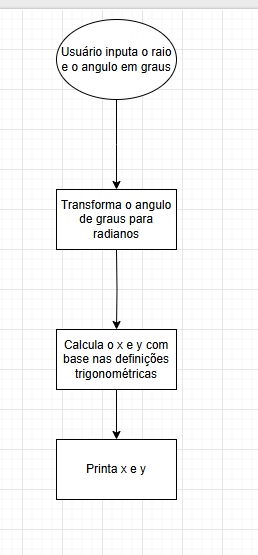

3) A sequência de Fibonacci são uma sequência de inteiros nos quais cada número é uma soma dos dois anteriores, com os primeiros dois números sendo 1 e 1. Escreva um programa que calcule os 200 primeiros números desta sequência.



In [46]:
n = 200
f1, f2 = 0, 1
print("Série:", f1, f2, end ="")

for i in range(2, n):
    f3 = f1 + f2
    f1 = f2
    f2 = f3
    print(f3, end=" ")

print()

Série: 0 11 2 3 5 8 13 21 34 55 89 144 233 377 610 987 1597 2584 4181 6765 10946 17711 28657 46368 75025 121393 196418 317811 514229 832040 1346269 2178309 3524578 5702887 9227465 14930352 24157817 39088169 63245986 102334155 165580141 267914296 433494437 701408733 1134903170 1836311903 2971215073 4807526976 7778742049 12586269025 20365011074 32951280099 53316291173 86267571272 139583862445 225851433717 365435296162 591286729879 956722026041 1548008755920 2504730781961 4052739537881 6557470319842 10610209857723 17167680177565 27777890035288 44945570212853 72723460248141 117669030460994 190392490709135 308061521170129 498454011879264 806515533049393 1304969544928657 2111485077978050 3416454622906707 5527939700884757 8944394323791464 14472334024676221 23416728348467685 37889062373143906 61305790721611591 99194853094755497 160500643816367088 259695496911122585 420196140727489673 679891637638612258 1100087778366101931 1779979416004714189 2880067194370816120 4660046610375530309 754011380474

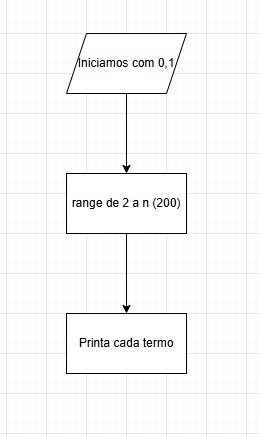

4) 

In [ ]:
import math

# Constantes 
G = 6.6738e-11  #constante gravitacional
M = 1.9891e30    # kg, massa do Sol
segundos_ano = 365 * 24 * 3600  # segundos em um ano

# input
l1 = float(input("Digite a distância no periélio (m): "))
v1 = float(input("Digite a velocidade no periélio (m/s): "))

# Coeficientes da equação quadrática para v2: A*v2^2 + B*v2 + C = 0
A = 1.0
B = - (2 * G * M) / (v1 * l1)
C = - (v1**2 - (2 * G * M / l1))

# Discriminante e raizes
discriminante = B**2 - 4 * A * C
if discriminante < 0:
    raise ValueError("Discriminante negativo: a órbita não é elíptica (energia positiva ou zero).")

v2_1 = (-B + math.sqrt(discriminante)) / (2 * A)
v2_2 = (-B - math.sqrt(discriminante)) / (2 * A)

# v2 deve ser menor que v1 (velocidade no afélio é mínima)
v2 = min(v2_1, v2_2)  # Escolhe a menor raiz 

# Cálculo de l2 usando a segunda lei de Kepler
l2 = (l1 * v1) / v2

# Parametros orbitais
a = 0.5 * (l1 + l2)          # Semi eixo maior
b = math.sqrt(l1 * l2)       # Semi eixo menor
e = (l2 - l1) / (l2 + l1)    # Excentricidade
T_segundos = (2 * math.pi * a * b) / (l1 * v1)  # Período orbital em segundos
T_anos = T_segundos / segundos_ano       # Período orbital em anos

# Saída dos resultados
print("\nResultados:")
print(f"Distância no afélio (l2) = {l2:.4e} m")
print(f"Velocidade no afélio (v2) = {v2:.4e} m/s")
print(f"Período orbital (T) = {T_segundos:.4e} segundos = {T_anos:.4f} anos")
print(f"Excentricidade (e) = {e:.6f}")

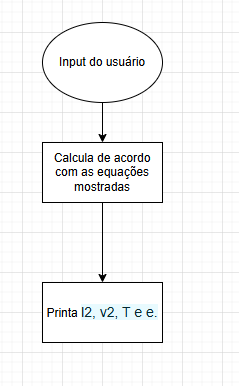

5) Uma pedra é lançada para cima do topo de um edifício a um ângulo de 30,0° na horizontal, com velocidade escalar inicial de 20,0 m/s, como mostrado abaixo. A altura de onde a pedra é lançada é de 45,0 m acima do solo.